#### Unsupervised Learning
- Given a set of variables, the goal is to discover interesting things about them: there is no output variable to predict.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors

plt.style.use("seaborn-v0_8")
random_state = 42

---
# Anomaly Detection
- Identification of rare samples which deviate significantly from the majority of the data and/or do not follow a well-defined notion of normal behavior
- In an Unsupervised Approach the samples are not labeled, therefore the goal is to discover dissimilarities among them


---
---
## Nearest Neighbors
- Given $k$ number of neighbors, $D$ distance threshold. Check every sample $X$ of the dataset. Let $N_X$ be the number of $D$-distance neighbors of $X$. If $N_X < k$ (if a sample has an insufficient number of neighbors) then mark the sample as anomalous, otherwise mark it as normal.

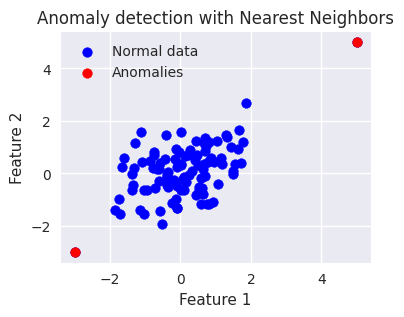

In [2]:
# Generate casual data with two anomalies
np.random.seed(random_state)
normal_data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100)
data = np.vstack((normal_data, [[5, 5], [-3, -3]]))

model = NearestNeighbors(n_neighbors=5)
model.fit(data)

# Find the nearest neighbors for all points
distances, indices = model.kneighbors(data)

# Identify the indices of anomalies points
anomaly_distance = 2
anomaly_indices = np.where(distances[:, -1] > anomaly_distance)[0]

plt.figure(figsize=(4, 3))
plt.scatter(data[:, 0], data[:, 1], color="blue", label="Normal data")
plt.scatter(data[anomaly_indices, 0], data[anomaly_indices, 1], color="red", label="Anomalies")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Anomaly detection with Nearest Neighbors")
plt.legend()
plt.grid(True)
plt.show()